# Module 4 - Solutions <a name="top"></a>

1. [Distributions](#dist)
2. [Central Limit Theorem](#clt)
3. [Bayes' Theorem](#Bayes)
4. [Matrix Algebra](#matalg)
5. [Eigenvalues and Eigenvectors](#eig)
6. [Regression Modeling](#reg)
---
[Back to top](#top)

## DISTRIBUTIONS <a name="dist"></a>

*Exercise:* Write R Python code that lets you draw “random” samples from the various distributions discussed in the slide deck section on distributions.```

*Solution:* several of the most commonly-used distributions have built-in calls in R. 

### Uniform $U(a,b)$.
Uniformly distributed numbers can be generated by `runif()` (call `?runif` at the prompt to get the function information).

The default call is `runif(N)`, producing $N$ uniformly distributed numbers on [0,1].

In [ ]:
runif(1)

In [ ]:
(x<-runif(10))
hist(x)

In [ ]:
(mean_x = mean(x))
(true_mean = (1+0)/2)
(var_x = var(x))
(true_var = 1/12*(1-0)^2)

The lower and upper bounds $a$ and $b$ can be specified as well:

In [ ]:
a=-2
b=3
N=250
y<-runif(N,min=a,max=b)
hist(y)
brks = seq(a,b,0.1)
hist(y, breaks = brks)

In [ ]:
(mean_y = mean(y))
(true_mean = (a+b)/2)
(var_y = var(y))
(true_var = 1/12*(b-a)^2)

### Normal $N(\mu,\sigma^2)$
 
Normally distributed numbers can be generated by `rnorm()`, which accepts three parameters: `n`, `mean`, `sd`. The default parameter values `mean`$=0$ and `sd`$=1$.  

In [ ]:
rnorm(1)

In [ ]:
z<-rnorm(500)
hist(z)
brks = seq(min(z),max(z),(max(z)-min(z))/20) # what does this line do?
hist(z, breaks = brks)

In [ ]:
w<-rnorm(5000, sd=3, mean=-2)
mean(w)
sd(w)
brks = seq(min(w),max(w),(max(w)-min(w))/50) 
hist(w, breaks = brks)

### Poisson $P(\lambda)$

Ditto, but with `rpois()`, with required parameters `n` and `lambda`.

In [ ]:
rpois(1,lambda=13)

In [ ]:
u<-rpois(500,lambda=13)
head(u)
mean(u)
var(u)
hist(u)

### Binormial $B(n,p)$

Would you believe that `rbinom()` does the trick? Parameters are `n`, `size`, `prob`. 

In [ ]:
rbinom(1, size=11, prob=0.2)

In [ ]:
v<- rbinom(1000,size=11, prob=0.2)
mean(v)
var(v)
brks = min(v):max(v) 
hist(v, breaks = brks)

In [ ]:
# let's try another one
v<- rbinom(1000,size=19, prob=0.7)
mean(v)
var(v)
brks = min(v):max(v) 
hist(v, breaks = brks)

### Log-normal $\Lambda(\mu,\sigma^2)$

`rlnorm()`? `rlnorm()`. With parameters `n`, `meanlog`, `sdlog` (whose default values are 0 and 1, respectively).

In [ ]:
rlnorm(1)

In [ ]:
s <- rlnorm(250,meanlog=0,sdlog=1)
hist(s)

### Exponential 
Exponentially distributed numbers are generated by `rexp()`, with required parameters `n` and `rate`.

In [ ]:
rexp(1,100)

In [ ]:
q<-rexp(1000,100)
mean(q)
var(q)
hist(q)

### Joint Normal
We can generate a multivariate joint normal via `MASS`'s `mvrnorm()`, whose required paramters are `n`, a mean vector `mu` and a covariance matrix `Sigma`. 

In [ ]:
# let's start with a standard bivariate joint normal
mu = rep(0,2)
Sigma = matrix(c(1,0,0,1),2,2)

In [ ]:
library(MASS)
a<-mvrnorm(1000,mu,Sigma)
a<-data.frame(a)
str(a)

In [ ]:
# let's plot the data... what would you expect to see here?
library(ggplot2)
library(hexbin)
qplot(X1, X2, data=a, geom="hex")

Now for a more interesting example: let's assume a more interesting covariance structure. 

In [ ]:
mu = c(-3,12)
Sigma = matrix(c(110,15,15,3),2,2)
a<-mvrnorm(1000,mu,Sigma)
a<-data.frame(a)
qplot(X1, X2, data=a, geom="hex") + ylim(-40,40) + xlim(-40,40)

---
[Back to top](#top)

## CENTRAL LIMIT THEOREM <a name="clt"></a>
*Exercise:* a large freight elevator can transport a maximum of 9800 lbs. Suppose a load containing 49 boxes must be transported. From experience, the weight of boxes follows a distribution with mean $\mu = 205$ lbs and standard deviation $\sigma = 15$ lbs. 

Using R and/or Python, estimate the probability that all 49 boxes can be safely loaded onto the freight elevator and transported. 

*Solution:* we are given $n = 49$, $\mu = 205$, $\sigma = 15$. Let's assume further that the boxes all come from different sources (i.e. the boxes' weight $x_i$ are independent of one another). 

To get a sense of the problem's feasibility, let's simulate a few scenarios. You'll notice that the problem makes no mention of the type of distribution followed by the weights. 

For now, let us assume that the weights are normally distributed. 

In [ ]:
set.seed(0) # to ensure replicability; the seed only applies to the next call requiring the pseudo-random generator
x<-rnorm(49,mean=205,sd=15)
hist(x)

The elevator can transport up to 9800 lbs; $n=49$ boxes can be transported if their total weight $$T=49w=x_1+\cdots+x_{49}$$ is less than 9800 lbs. In mathematical terms, we're interested in the probability $P(T<9800)$.

For the sample `x` from above, we get:

In [ ]:
(T<-sum(x))

and so that specific group of 49 boxes would be too heavy to carry in one trip. Perhaps we were simply unlucky -- perhaps another group of boxes would have been light enough. Let's try the same thing, but with a different group of boxes. 







In [ ]:
set.seed(999) # to ensure replicability; the seed only applies to the next call requiring the pseudo-random generator
(T=sum(rnorm(49,mean=205,sd=15)))

Close, but no cigar. However, two tries aren't  enough to establish a trend and to estimate $P(T<9800)$. We'll write a little function to help us find an estimate. The idea is simple: if we were to try a large number of random combinations of 49 boxes, the proportion of the attempts for which the total weight $T$ falls below 9800 is hopefully going to approximate $P(T<9800)$.

In [ ]:
# see if you can figure out what kind of inputs these are meant to be, and what this code does
# running this cell will compile the function
# it still needs to be called with appropriate inputs to provide an estimate for P(T<9800)

estimate_T.normal <- function(n, T.threshold, mean, sd, num.tries){
    a=0
    for(j in 1:num.tries){
        if(sum(rnorm(n,mean=mean,sd=sd))<T.threshold){
            a=a+1
        }        
    }
    estimate_T.normal <- a/num.tries
}

We'll try the experiment 10, 100, 1000, 10000, 100000, and 1000000 times.

In [ ]:
(c(estimate_T.normal(49,9800,205,15,10),
    estimate_T.normal(49,9800,205,15,100),
    estimate_T.normal(49,9800,205,15,1000),
    estimate_T.normal(49,9800,205,15,10000),
    estimate_T.normal(49,9800,205,15,100000),
    estimate_T.normal(49,9800,205,15,1000000)))

We can't say too much from such a simple set up, but it certainly seems as though we could expect success about 1% of the time.

That's low, but perhaps that was because we assumed normality? What would happen if we used other distributions with the same characteristics, such as $U(179.0192379,230.9807621)$ or $\Lambda(5.320340142, 0.005339673624)$? (How would you verify that these distributions indeed have the right characteristics? How would you determine the appropriate parameters?)

Let's try with those distributions as well.

In [ ]:
estimate_T.unif <- function(n, T.threshold, min, max, num.tries){
    a=0
    for(j in 1:num.tries){
        if(sum(runif(n,min=min,max=max))<T.threshold){
            a=a+1
        }        
    }
    estimate_T.unif <- a/num.tries
}

(c(estimate_T.unif(49,9800,179.0192379,230.9807621,10), 
   estimate_T.unif(49,9800,179.0192379,230.9807621,100),
   estimate_T.unif(49,9800,179.0192379,230.9807621,1000),
   estimate_T.unif(49,9800,179.0192379,230.9807621,10000),
   estimate_T.unif(49,9800,179.0192379,230.9807621,100000),
   estimate_T.unif(49,9800,179.0192379,230.9807621,1000000)))

In [ ]:
estimate_T.lnorm <- function(n, T.threshold, meanlog, sdlog, num.tries){
    a=0
    for(j in 1:num.tries){
        if(sum(rlnorm(n,meanlog=meanlog,sdlog=sdlog))<T.threshold){
            a=a+1
        }        
    }
    estimate_T.lnorm <- a/num.tries
}

(c(estimate_T.lnorm(49,9800,5.320340142,sqrt(0.005339673624),10), 
   estimate_T.lnorm(49,9800,5.320340142,sqrt(0.005339673624),100),
   estimate_T.lnorm(49,9800,5.320340142,sqrt(0.005339673624),1000),
   estimate_T.lnorm(49,9800,5.320340142,sqrt(0.005339673624),10000),
   estimate_T.lnorm(49,9800,5.320340142,sqrt(0.005339673624),100000),
   estimate_T.lnorm(49,9800,5.320340142,sqrt(0.005339673624),1000000)))

Under all three distributions, it certainly appears as though the $P(T<9800)$ converges to a value near 1% (even though the three distributions are very different). That might be surprising at first glance, but it isn't really, given the **Central Limit Theorem**.

In effect, we are interested in estimating $P(T<9800)= P(w< 9800/49)=P(w<200)$ (where $w$ is the mean weight of the boxes). 

According to the Central Limit Theorem, the distribution of $w$ is approximately normal with mean $205$ and variance $\frac{15^2}{49}$ (even if the weights themselves were not normally distributed).

By subtracting the mean of $w$ and dividing by the standard deviation we obtain a new random variable $z$ which is approximately the standard unit normal, i.e. $$P(w<200) \approx P\left(z<\frac{200 - 205}{15/7}\right)$$

In [ ]:
(200-205)/(15/7)

Thus, $P(w<200) \approx P(z<-2.33)$ and we need to find the probability that the standard unit normal is smaller than -2.33. This can be calculated with the `pnorm()` function:

In [ ]:
pnorm(-2.33, mean=0, sd=1)

Hence, $P(T<9800)\approx 0.0099$, which means that it's highly unlikely that the 49 boxes can be transported in the elevator. 

The following routine approximates the probability in question without resorting to simulating the weights (that is, independently of the underlying distribution of weights) for given `n`, `threshold`, `mean`, and `sd`.

What elevator threshold would be required to reach a probability of success of 10%? 50%? 75%? 

In [ ]:
prob_T <- function(n,threshold,mean,sd){
    prob_T=pnorm((threshold/n - mean)/(sd/sqrt(n)),0,1)
}

max(which(prob_T(49,1:12000,205,15)<0.1))
max(which(prob_T(49,1:12000,205,15)<0.5))
max(which(prob_T(49,1:12000,205,15)<0.75))

plot((prob_T(49,1:12000,205,15)))

---
[Back to top](#top)

## BAYES' THEOREM <a name="Bayes"></a>

*EXERCISE:* suppose that a test for a particular disease has a very high success rate:
- if a patient has the disease, the test accurately reports a 'positive' with probability 0.99;
- if a patient does not have the disease, the test accurately reports a 'negative' with probability 0.95. 

Assume further that only 0.1% of the population has the disease. What is the probability that a patient who tests positive does not in fact have the disease? 

*SOLUTION:* Let $D$ be the event that the patient has the disease, and $A$ be the event that the test is positive. The probability of a true positive is 

$$P(D|A) = \frac{P(A|D)\times P(D)}{P(A|D)\times P(D) + P(A|-D)\times P(-D)} = \frac{0.99 \times 0.001}{0.99 \times 0.001+0.05 \times 0.999} \approx 0.019;$$

the probability of a false positive is thus $1 − 0.019 = 0.981$.

Despite the apparent high accuracy of the test, the incidence of the disease is so low (one in a 1000) that the vast majority of patients who test positive (98 in 100) do not have the disease (20 times the proportion before the outcome of the test is known).



---
[Back to top](#top)
## MATRIX ALGEBRA <a name="matalg"></a>

*EXERCISE:* in R, construct $3\times 3$ square matrices $A$, $B$, $C$ and compute the following:
- $A+B$, $BC$, $CB$, $A^{\top}$, $CA^{\top}$
- $\mbox{tr}(A)$, $\mbox{tr}(3A)$, $\mbox{tr}(C)$, $\mbox{tr}(-C)$, $\mbox{tr}(3A-C)$
- $\mbox{det}(A)$, $\mbox{det}(A^{\top})$, $\mbox{det}(B)$, $\mbox{det}(C)$, $\mbox{det}(BC)$, $\mbox{det}(CB)$
- $A^{-1}$, $B^{-1}$, $C^{-1}$, if the respective determinants are $\neq 0$
- $\mbox{det}\left(A^{-1}\right)$, $\mbox{det}\left(B^{-1}\right)$, $\mbox{det}\left(C^{-1}\right)$, if the respective matrices are invertible

Can you infer rules from these computations?

*SOLUTIONS:* it's pretty easy once you know how to set up matrices in R (which is backwards in many ways, I find).

We can do it this way, say: 

In [ ]:
set.seed(1010) # for replicability, you can use your own seed
(A<- matrix(runif(9),3,3))
(B<-matrix(c(1,0,0,0,2,0,0,0,3),3,3))
(C <- matrix(1:9,3,3))

The familiar matrix algebra operations exist in R, but there are still a number of "gotchas!"

In [ ]:
A+B
B%*%C # not the same as B*C, which is in fact term-by-term multiplication... try it!
C%*%B
t(A)
C%*%t(A)

There does not seem to be a native trace function in R (although some packages have such a function, like the `psych` package). User `TsTeaTime` suggests the following function [https://stackoverflow.com/questions/38045317/what-function-to-use-for-trace-matrix-in-r](https://stackoverflow.com/questions/38045317/what-function-to-use-for-trace-matrix-in-r)  

In [ ]:
tr <- function (m){
  total_sum <- 0
  if(is.matrix(m)){
      row_count <- nrow(m)
      col_count <- ncol(m)
      if(row_count == col_count){
        total_sum <-sum(diag(m))
        total_sum
      }
      else{
        message ('Matrix is not square')
      }
  }
  else{
    message( 'Object is not a matrix')
  }
}

c(tr(A),
    tr(3*A),
    tr(C),
    tr(-C),
    tr(3*A-C))

There is a native determinant function, however.

In [ ]:
c(det(A),
    det(t(A)),
    det(B),
    det(C),
    det(B%*%C),
    det(C%*%B))

Only $A$ and $B$ are invertible since their det $\neq 0$. **CAREFUL: `A^(-1)` DOES NOT INVERT THE MATRIX `A` in R** (unlike in civilized languages) **... instead, it inverts each of the entries in the matrix**.

In [ ]:
solve(A)
solve(B)
solve(C)
# I ask you... is that a resonable name for the inverse function?!?

In [ ]:
det(ginv(A))
det(ginv(B))

---
[Back to top](#top)
## EIGENVALUES AND EIGENVECTORS <a name="eig"></a>
Compute the eigendecomposition of the matrices $A$, $B$, and $C$ constructed above.


In [ ]:
eig_A <- eigen(A)
attributes(eig_A)      # find the attributes of the eig_A object
(D=diag(eig_A$values)) # eigenvalues on the diagonal
(V=eig_A$vectors)      # eigenvectors as columns
A-V%*%D%*%solve(V)     # verification

In [ ]:
eig_B <- eigen(B)
(D=diag(eig_B$values)) # eigenvalues on the diagonal
(V=eig_B$vectors)      # eigenvectors as columns
B-V%*%D%*%solve(V)     # verification

In [ ]:
eig_C <- eigen(C)
(D=diag(eig_C$values)) # eigenvalues on the diagonal
(V=eig_C$vectors)      # eigenvectors as columns
C-V%*%D%*%solve(V)     # verification

---
[Back to top](#top)
## REGRESSION MODELING <a name="reg"></a>

*EXERCISE:* an auto part is manufactured by a company once a month in lots that vary in size as demand fluctuates. The data below represent observations on lot size $y$, and number of employee-hours of labor $x$ for 10 recent production runs. 

Fit a simple regression model $y_i=\beta_0+\beta_1 x_i+\varepsilon_i$, where $E(\varepsilon_i)=0$, $E(\varepsilon_i\varepsilon_j)=0$ for $i\neq j$, and $V(\varepsilon_i)=\sigma^2$ if the observations are: 
$$𝒀=[73,50,128,170,87,108,135,69,148,132]^{\top},
𝒙=[30,20,60,80,40,50,60,30,70,60]^{\top}.$$

*SOLUTION:* the line of best fit can be obtained _via_ the **design matrix** $X=[1 𝒙]$, which allows us to compute $(X^{\top}X)^{-1}$, $X^{\top}𝒀$ , and $\hat{\beta} = (X^{\top}X)^{-1}X^{\top}𝒀$.

In [6]:
X=cbind(matrix(rep(1,10),10,1),matrix(c(30,20,60,80,40,50,60,30,70,60),10,1))
Y=matrix(c(73,50,128,170,87,108,135,69,148,132),10,1)
t(X)
t(Y)

1,1,1,1,1,1,1,1,1,1
30,20,60,80,40,50,60,30,70,60


73,50,128,170,87,108,135,69,148,132


In [8]:
beta=solve(t(X)%*%X)%*%t(X)%*%Y
beta

10
2


The line of best fit (in the ordinary least square sense) is thus $y=10+2x$. Let's see what it would look like in practice.

In [16]:
library(ggplot2)
data.set = data.frame(cbind(X,Y))
data.set = data.set[,c(2,3)]
str(data.set)

'data.frame':	10 obs. of  2 variables:
 $ X2: num  30 20 60 80 40 50 60 30 70 60
 $ X3: num  73 50 128 170 87 108 135 69 148 132


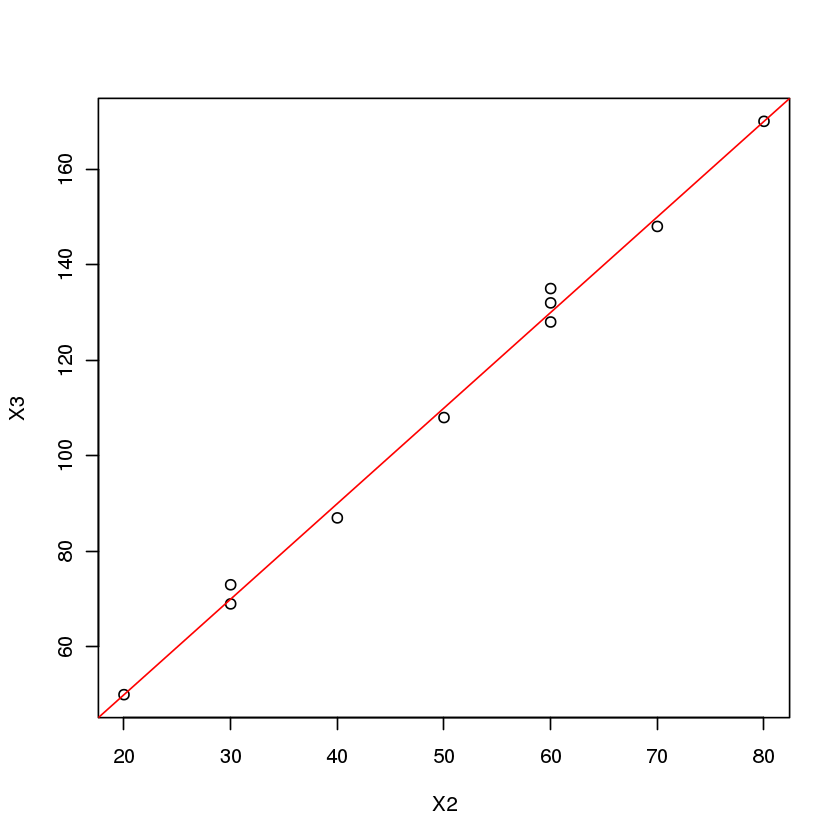

In [17]:
plot(data.set)
abline(a=beta[1], b=beta[2], col="red")

Of course, no one computes the line of best fit that way in applications. 

Once you've convinved yourself that the OLS framework is valid for your data, it makes much more sense to use the built-in functionality, such as is offered by `lm()` (it's not the only such method; I'm presenting it mostly to make the point that the R syntax for predictive models usually follows this format -- a method produces an object (the **model**), and the method call requires the user to pass on a model structure (y ~ predictors), specify the dataset, and a number of potential options).  

In [19]:
best.fit = lm(X3~X2, data=data.set)
best.fit


Call:
lm(formula = X3 ~ X2, data = data.set)

Coefficients:
(Intercept)           X2  
         10            2  


We see quickly that the answer that was computed directly above is the same as the one provided by `lm()`, which is good news, but we can get more information _via_ the `summary()` function.

In [20]:
summary(best.fit)


Call:
lm(formula = X3 ~ X2, data = data.set)

Residuals:
   Min     1Q Median     3Q    Max 
  -3.0   -2.0   -0.5    1.5    5.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.00000    2.50294   3.995  0.00398 ** 
X2           2.00000    0.04697  42.583 1.02e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.739 on 8 degrees of freedom
Multiple R-squared:  0.9956,	Adjusted R-squared:  0.9951 
F-statistic:  1813 on 1 and 8 DF,  p-value: 1.02e-10


Ok, there's a lot more to be said about regression models, but I'm assuming that you've all taken some courses on the topic and we won't get bogged down with the specifics, other than to mention that in a very real sense, regression modeling is a form of **A.I.** (although not the way it is usually put in practice). We'll talk about this again. 

---
[Back to top](#top)